In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("./数据处理后的用电数据_可用于建模.xlsx")
df = df.drop("Unnamed: 0",axis=1)
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 589
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       577 non-null    datetime64[ns]
 1   active_energy   577 non-null    float64       
 2   current_A       577 non-null    float64       
 3   current_B       577 non-null    float64       
 4   current_C       577 non-null    float64       
 5   power_A         577 non-null    float64       
 6   power_B         577 non-null    float64       
 7   power_C         577 non-null    float64       
 8   apparent_power  577 non-null    float64       
 9   hour            577 non-null    float64       
 10  is_workday      577 non-null    float64       
 11  total_power     577 non-null    float64       
 12  power_factor    577 non-null    float64       
 13  load_imbalance  577 non-null    float64       
 14  energy_delta    577 non-null    float64       
dtypes: dat

In [55]:
df.head(10)

,timestamp,active_energy,current_A,current_B,current_C,power_A,power_B,power_C,apparent_power,hour,is_workday,total_power,power_factor,load_imbalance,energy_delta
0,2025-06-01 00:00:00,9215940.0,-0.470812,-0.589244,-0.513244,-0.491496,-0.585635,-0.513961,-0.560500,0.0,0.0,322.36,0.975784,73.388230,0.0
1,2025-06-01 01:00:00,9216270.0,-0.599262,-0.583721,-0.583744,-0.612114,-0.577090,-0.576008,-0.603930,1.0,0.0,310.70,0.969151,71.335446,330.0
2,2025-06-01 02:00:00,9216579.0,-0.678379,-0.665780,-0.625306,-0.679972,-0.645325,-0.607492,-0.664740,2.0,0.0,298.54,0.972728,74.463038,309.0
3,2025-06-01 03:00:00,9216908.0,-0.483423,-0.488651,-0.408033,-0.510587,-0.495480,-0.420545,-0.459860,3.0,0.0,336.67,0.953739,91.284321,329.0
4,2025-06-01 04:00:00,9217232.0,-0.613460,-0.537025,-0.530559,-0.627386,-0.529907,-0.528324,-0.553965,4.0,0.0,317.78,0.957659,82.704815,324.0
5,2025-06-01 05:00:00,9217581.0,-0.503966,-0.509209,-0.432043,-0.526553,-0.505263,-0.441342,-0.477552,5.0,0.0,333.15,0.954530,89.356909,349.0
6,2025-06-01 06:00:00,9217907.0,-0.341529,-0.424722,-0.434415,-0.359077,-0.438638,-0.450075,-0.404116,6.0,0.0,347.42,0.950430,67.787265,326.0
8,2025-06-01 08:00:00,9218663.0,0.332725,0.272372,0.278787,0.290524,0.236904,0.241871,0.248844,8.0,0.0,499.62,0.975001,116.791204,756.0
9,2025-06-01 09:00:00,9219197.0,0.364689,0.449993,0.596395,0.345019,0.422663,0.582788,0.449858,9.0,0.0,547.43,0.981673,173.033507,534.0
10,2025-06-01 10:00:00,9219743.0,0.324278,0.391239,0.464855,0.358903,0.407554,0.504654,0.412073,10.0,0.0,540.21,0.983720,153.174967,546.0


In [50]:
df.tail()

,timestamp,active_energy,current_A,current_B,current_C,power_A,power_B,power_C,apparent_power,hour,is_workday,total_power,power_factor,load_imbalance,energy_delta
584,2025-06-25 08:00:00,9489604.0,0.538864,0.597224,0.690272,0.514752,0.572879,0.677468,0.586060,8.0,1.0,577.58,0.981795,168.898059,495.0
585,2025-06-25 09:00:00,9490241.0,0.651927,0.747318,0.829402,0.663311,0.733127,0.842238,0.734353,9.0,1.0,613.42,0.986761,181.280814,637.0
586,2025-06-25 10:00:00,9490869.0,0.683058,0.647159,0.740611,0.676848,0.616347,0.733770,0.652427,10.0,1.0,595.33,0.986920,160.248787,628.0
588,2025-06-25 12:00:00,9492159.0,1.010747,0.860865,1.085444,1.011454,0.823034,1.018384,0.935677,12.0,1.0,656.07,0.983702,185.573644,1290.0
589,2025-06-25 13:00:00,9492825.0,0.935081,0.737227,0.768231,0.975009,0.749102,0.782259,0.832681,13.0,1.0,627.45,0.974649,133.822485,666.0


In [25]:
df.columns

Index(['timestamp', 'active_energy', 'current_A', 'current_B', 'current_C',
       'power_A', 'power_B', 'power_C', 'apparent_power', 'hour', 'is_workday',
       'total_power', 'power_factor', 'load_imbalance', 'energy_delta'],
      dtype='object')

In [ ]:
# 设置全局字体为黑体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

### 1.用电量随时间变化趋势

In [78]:
df['hour'] = df['timestamp'].dt.hour
daily_avg = df.groupby('hour')['total_power'].mean()

#### 1.2日用电模式对比

- 分析目标：比较工作日与休息日的典型用电模式差异

In [16]:
# 计算小时级平均值
hourly_avg = df.groupby(['is_workday', 'hour']).agg({
    'total_power': 'mean',
    'power_factor': 'mean'
}).reset_index()


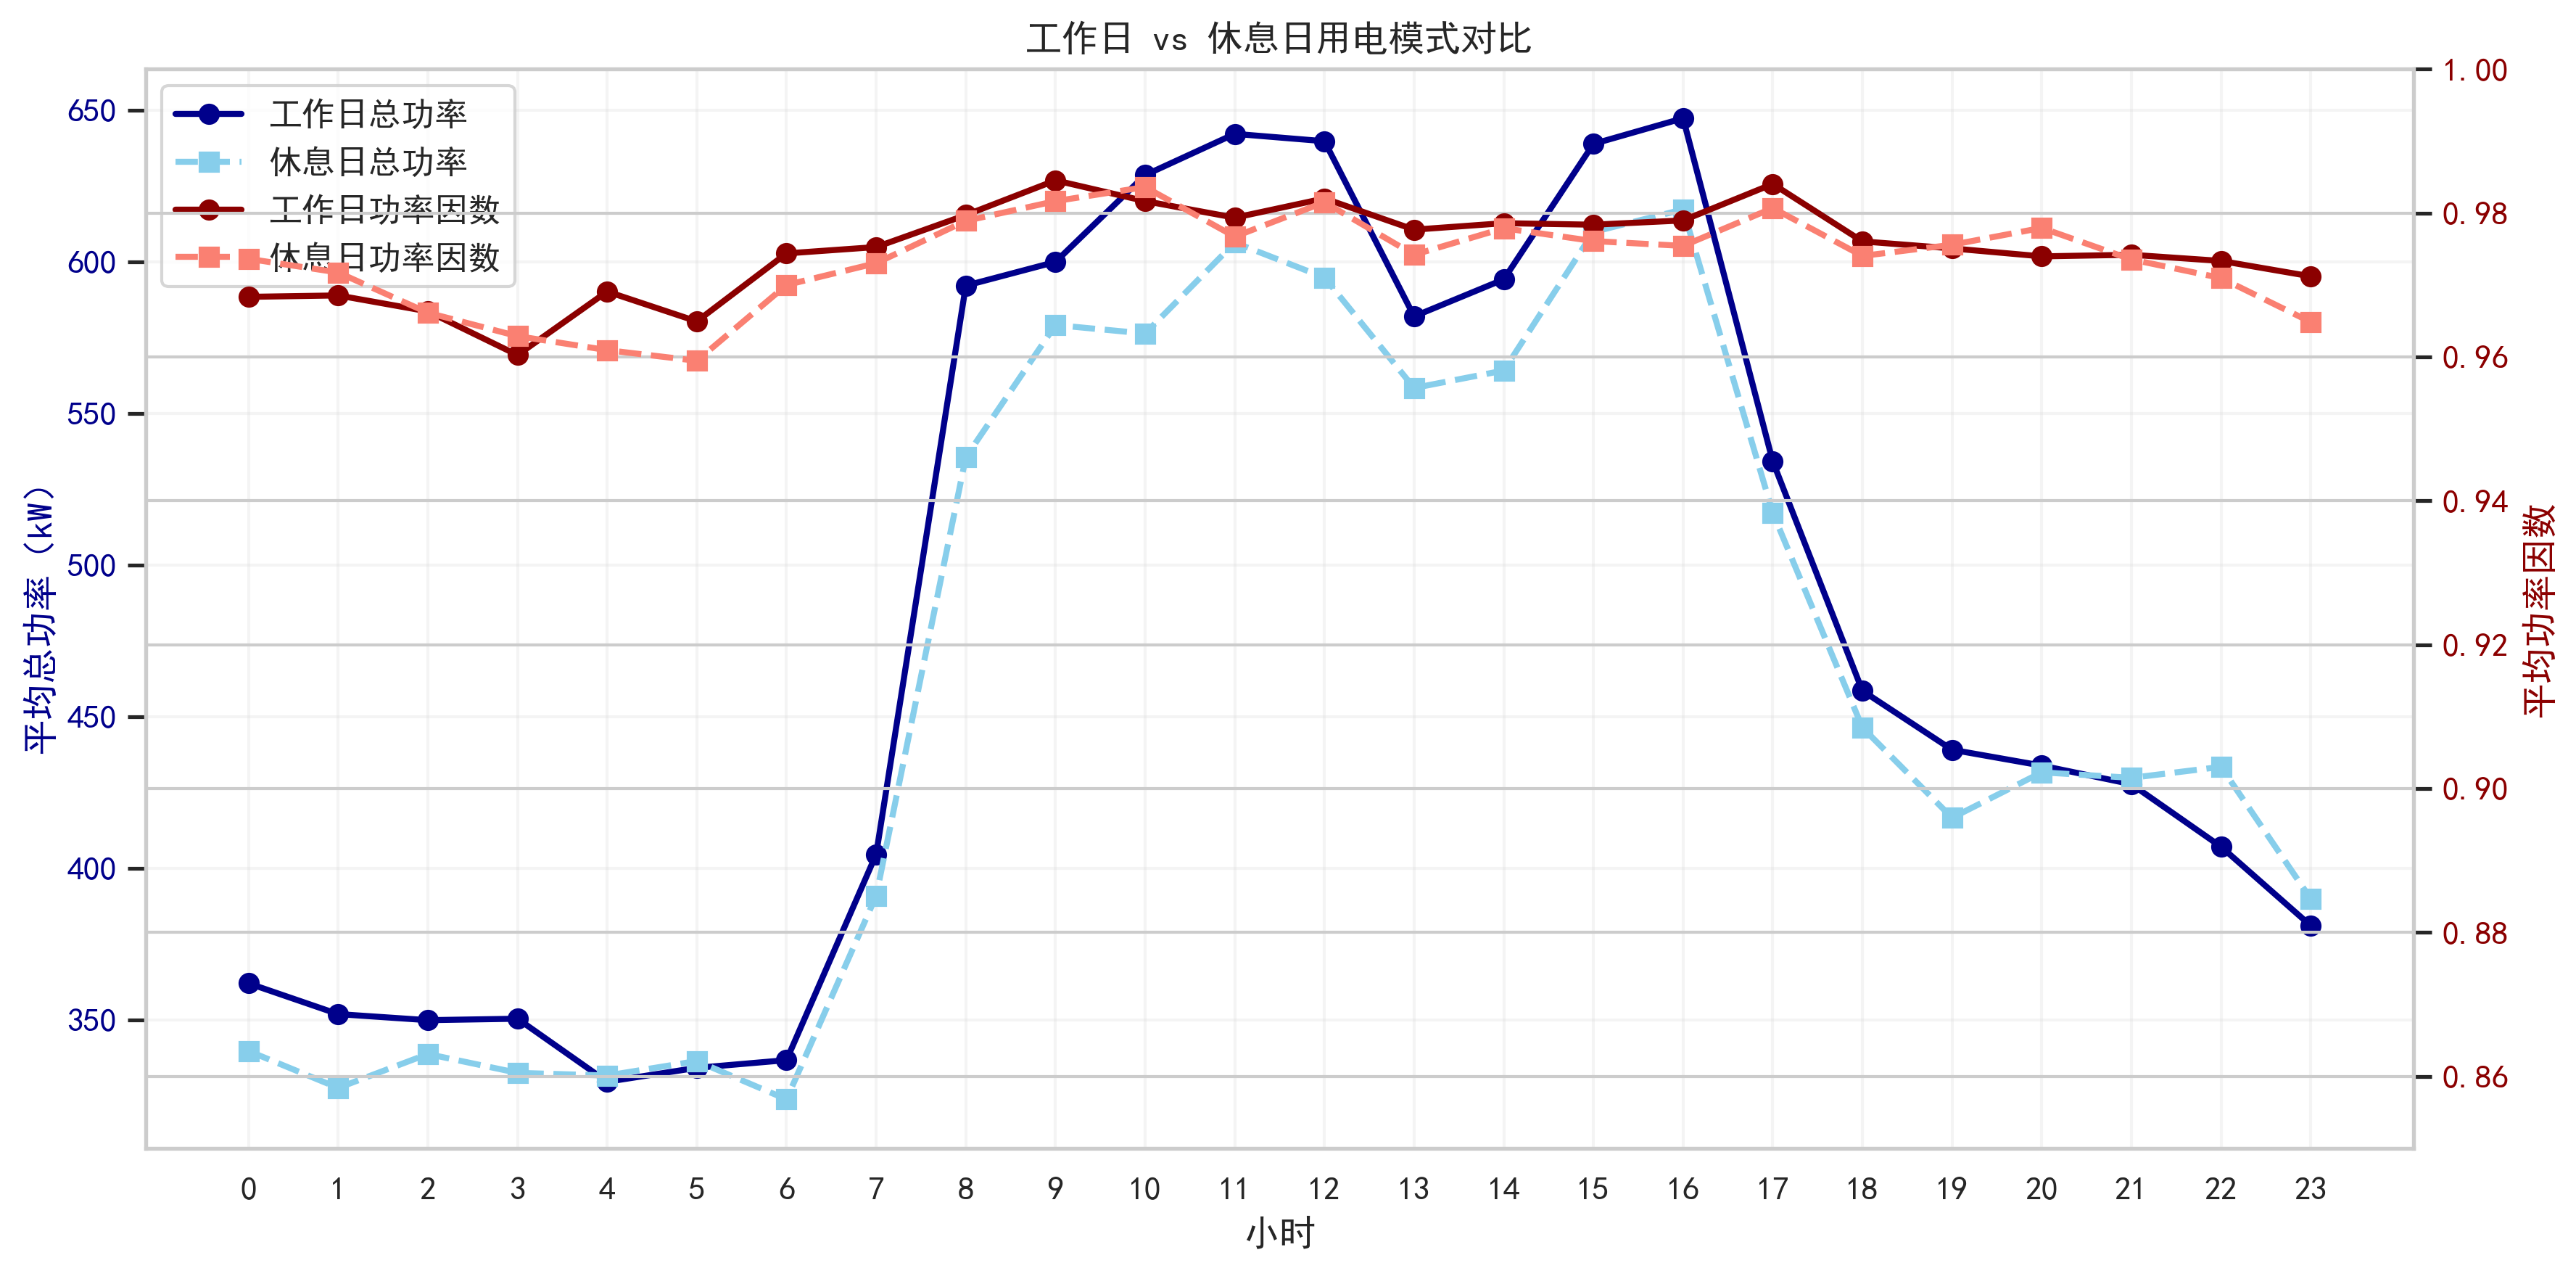

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 工作日总功率曲线
workday = hourly_avg[hourly_avg['is_workday'] == 1]
ax1.plot(workday['hour'], workday['total_power'], 
         'o-', color='darkblue', linewidth=2, label='工作日总功率')

# 休息日总功率曲线
offday = hourly_avg[hourly_avg['is_workday'] == 0]
ax1.plot(offday['hour'], offday['total_power'], 
         's--', color='skyblue', linewidth=2, label='休息日总功率')

ax1.set_xlabel('小时')
ax1.set_ylabel('平均总功率（kW）', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.set_xticks(range(0, 24))
ax1.grid(alpha=0.2)

# 创建次Y轴
ax2 = ax1.twinx()

# 工作日功率因数曲线
ax2.plot(workday['hour'], workday['power_factor'], 
         'o-', color='darkred', linewidth=2, label='工作日功率因数')

# 休息日功率因数曲线
ax2.plot(offday['hour'], offday['power_factor'], 
         's--', color='salmon', linewidth=2, label='休息日功率因数')

ax2.set_ylabel('平均功率因数', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.85, 1.0)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('工作日 vs 休息日用电模式对比')
plt.tight_layout()
plt.show()

- 分析结果：

    1. 显著的总功率差异：
        - 工作日负荷更高：工作日的 平均总功率在全天大部分时段显著高于休息日，尤其是在核心工作时段（如 8:00-18:00）。这清晰地反映了工商业活动、办公设备运行对电力消耗的主导作用。
        - 休息日负荷更平缓：休息日的总功率曲线 波动幅度明显小于工作日，整体负荷水平较低。
     
    2. 典型用电高峰模式对比：
         - 工作日：
            1. 早高峰： 通常在上午开始时段（如 8:00-10:00） 出现第一个明显的用电高峰，对应上班、设备启动。
            2. 午间略降/平台：可能在午休时段（如 12:00-13:00）有小幅下降或平台期。
            3. 下午主高峰：下午（如 13:00-17:00）是全天的最高峰时段，负荷达到峰值，反映生产、办公、空调等综合需求达到顶峰。
     
         - 休息日：
             1. 平缓上升与温和高峰：用电量通常在 上午较晚时候（如 10:00 后）开始平缓上升，在下（如 13:00-19:00）形成一个 相对宽阔、平缓的“驼峰”状高峰，对应居民生活活动（家务、娱乐、空调/采暖）。其 峰值远低于工作日的下午高峰。
             2. 夜间差异小：在 深夜和凌晨（如 22:00-6:00），工作日和休息日的用电量差异最小，均处于低谷状态。

- 功率因数特性对比：

1. 工作日功率因数更高且更稳定：工作日的平均功率因数 整体高于休息日，且在核心工作时段（如 8:00-18:00）保持相对稳定（如图中可能在 0.98 附近）。这主要是由于大量运行的工业电机、变频器等设备具有较高的功率因数（容性或接近1），以及电网补偿措施的有效运行。

2. 休息日功率因数较低且波动较大：

    整体较低：休息日功率因数显著低于工作日（如图中可能在 0.96-0.97 范围）。

    波动更明显：曲线波动幅度大于工作日，特别是在非高峰时段（如夜间、清晨）可能更低。这反映出：

        用电负荷构成变化：居民用电占比大幅提高，而家用电器（如空调、电视机、充电器、LED灯）通常具有较低的功率因数（感性或容性），且启停更频繁、随机。





#### 1.2每小时用电量变化趋势（2025-06-01 至 2025-06-25）

- 分析目标：观察每小时总功率（total_power）随时间的变化趋势，识别用电高峰和低谷时段

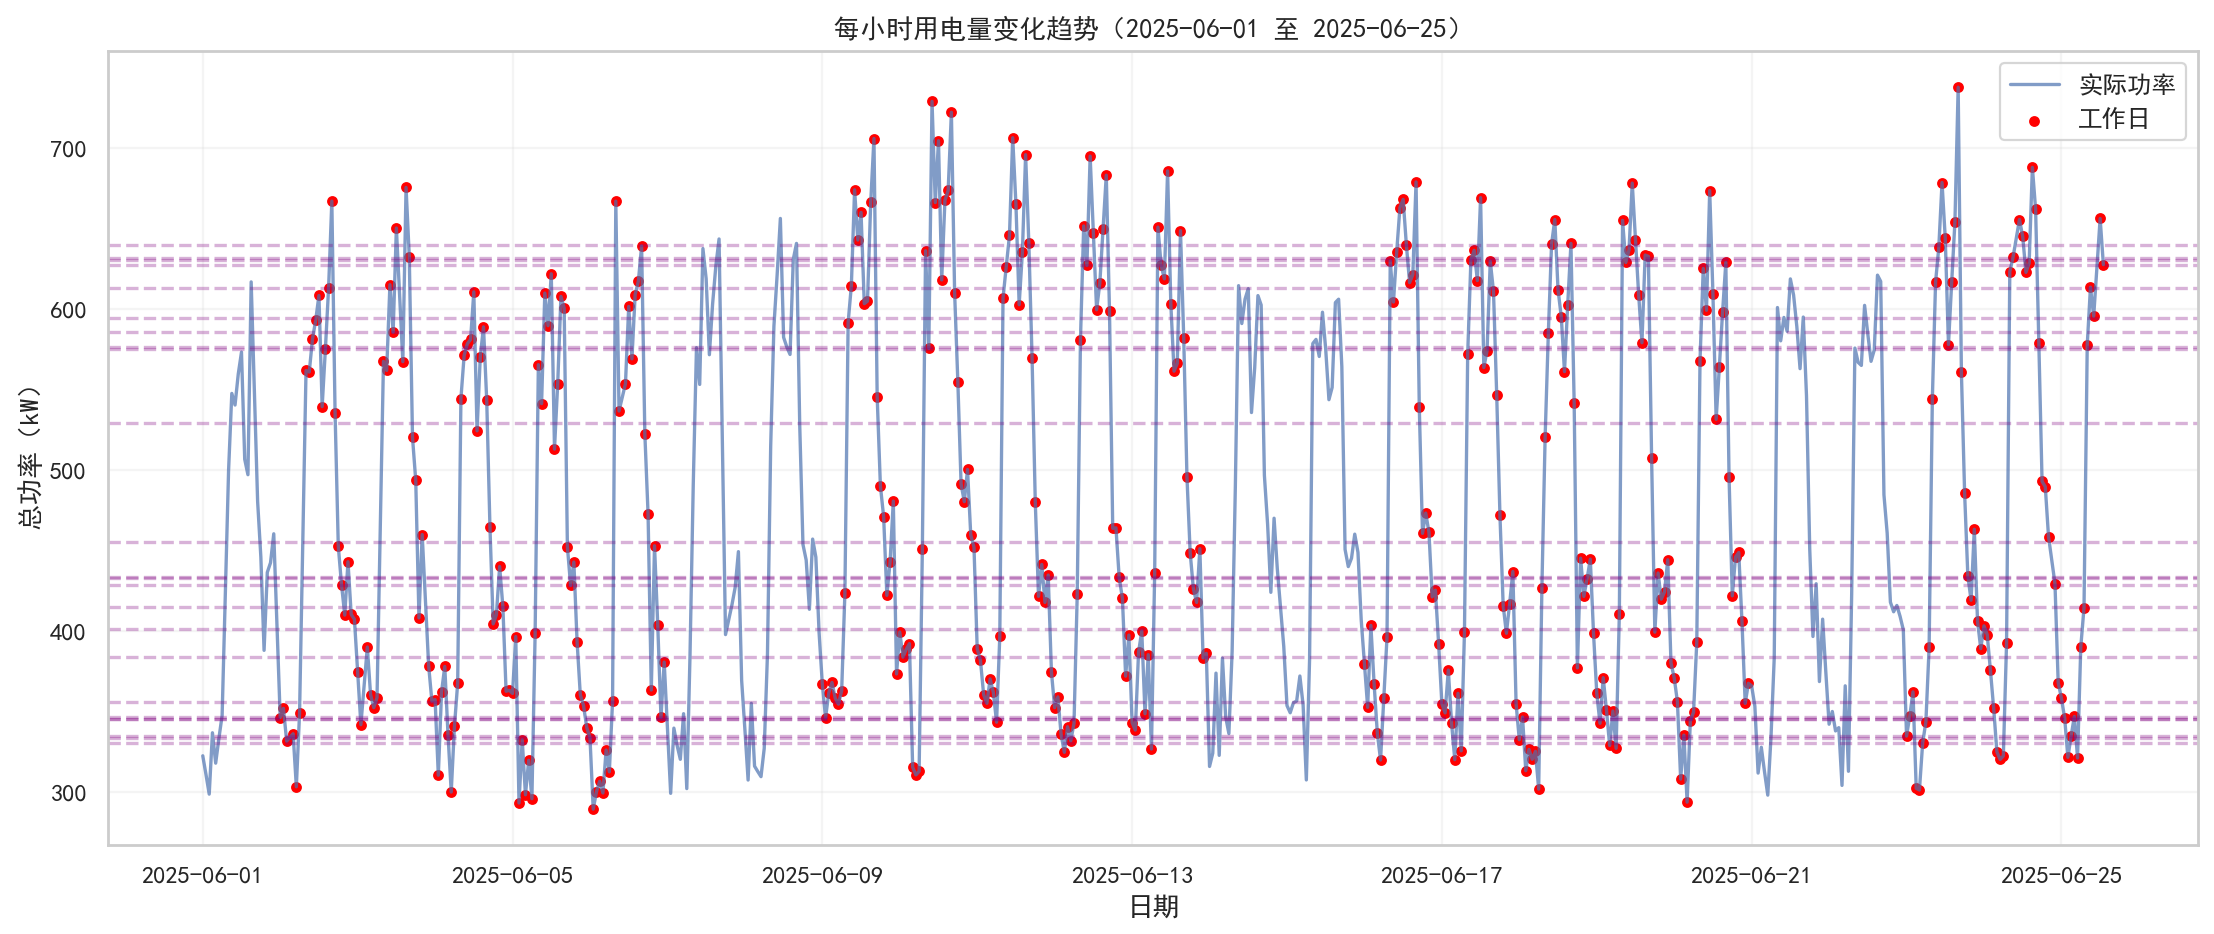

In [79]:
plt.figure(figsize=(14, 6),dpi=160)
plt.plot(df['timestamp'], df['total_power'], 
         alpha=0.7, 
         label='实际功率')

# 标记工作日
workdays = df[df['is_workday'] == 1]
plt.scatter(workdays['timestamp'], workdays['total_power'],
            color='red', s=15, label='工作日')

# 添加24小时平均线
for hour, avg in daily_avg.items():
    plt.axhline(y=avg, color='purple', linestyle='--', alpha=0.3)

plt.title('每小时用电量变化趋势（2025-06-01 至 2025-06-25）')
plt.xlabel('日期')
plt.ylabel('总功率（kW）')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

- 分析结果：

    该图清晰地揭示了用电量最核心的规律：
    
    1. 用电行为高度依赖时间：存在固定的日内高峰（白天/下午）和低谷（深夜/凌晨）。

    2.工作日驱动用电波动：工作日是形成显著峰谷差的关键时期。
    
    

### 2.三相负载平衡度分析

- 分析目标：分析三相电流（current_A/B/C）的平衡状态与负载不平衡度（load_imbalance）的关系

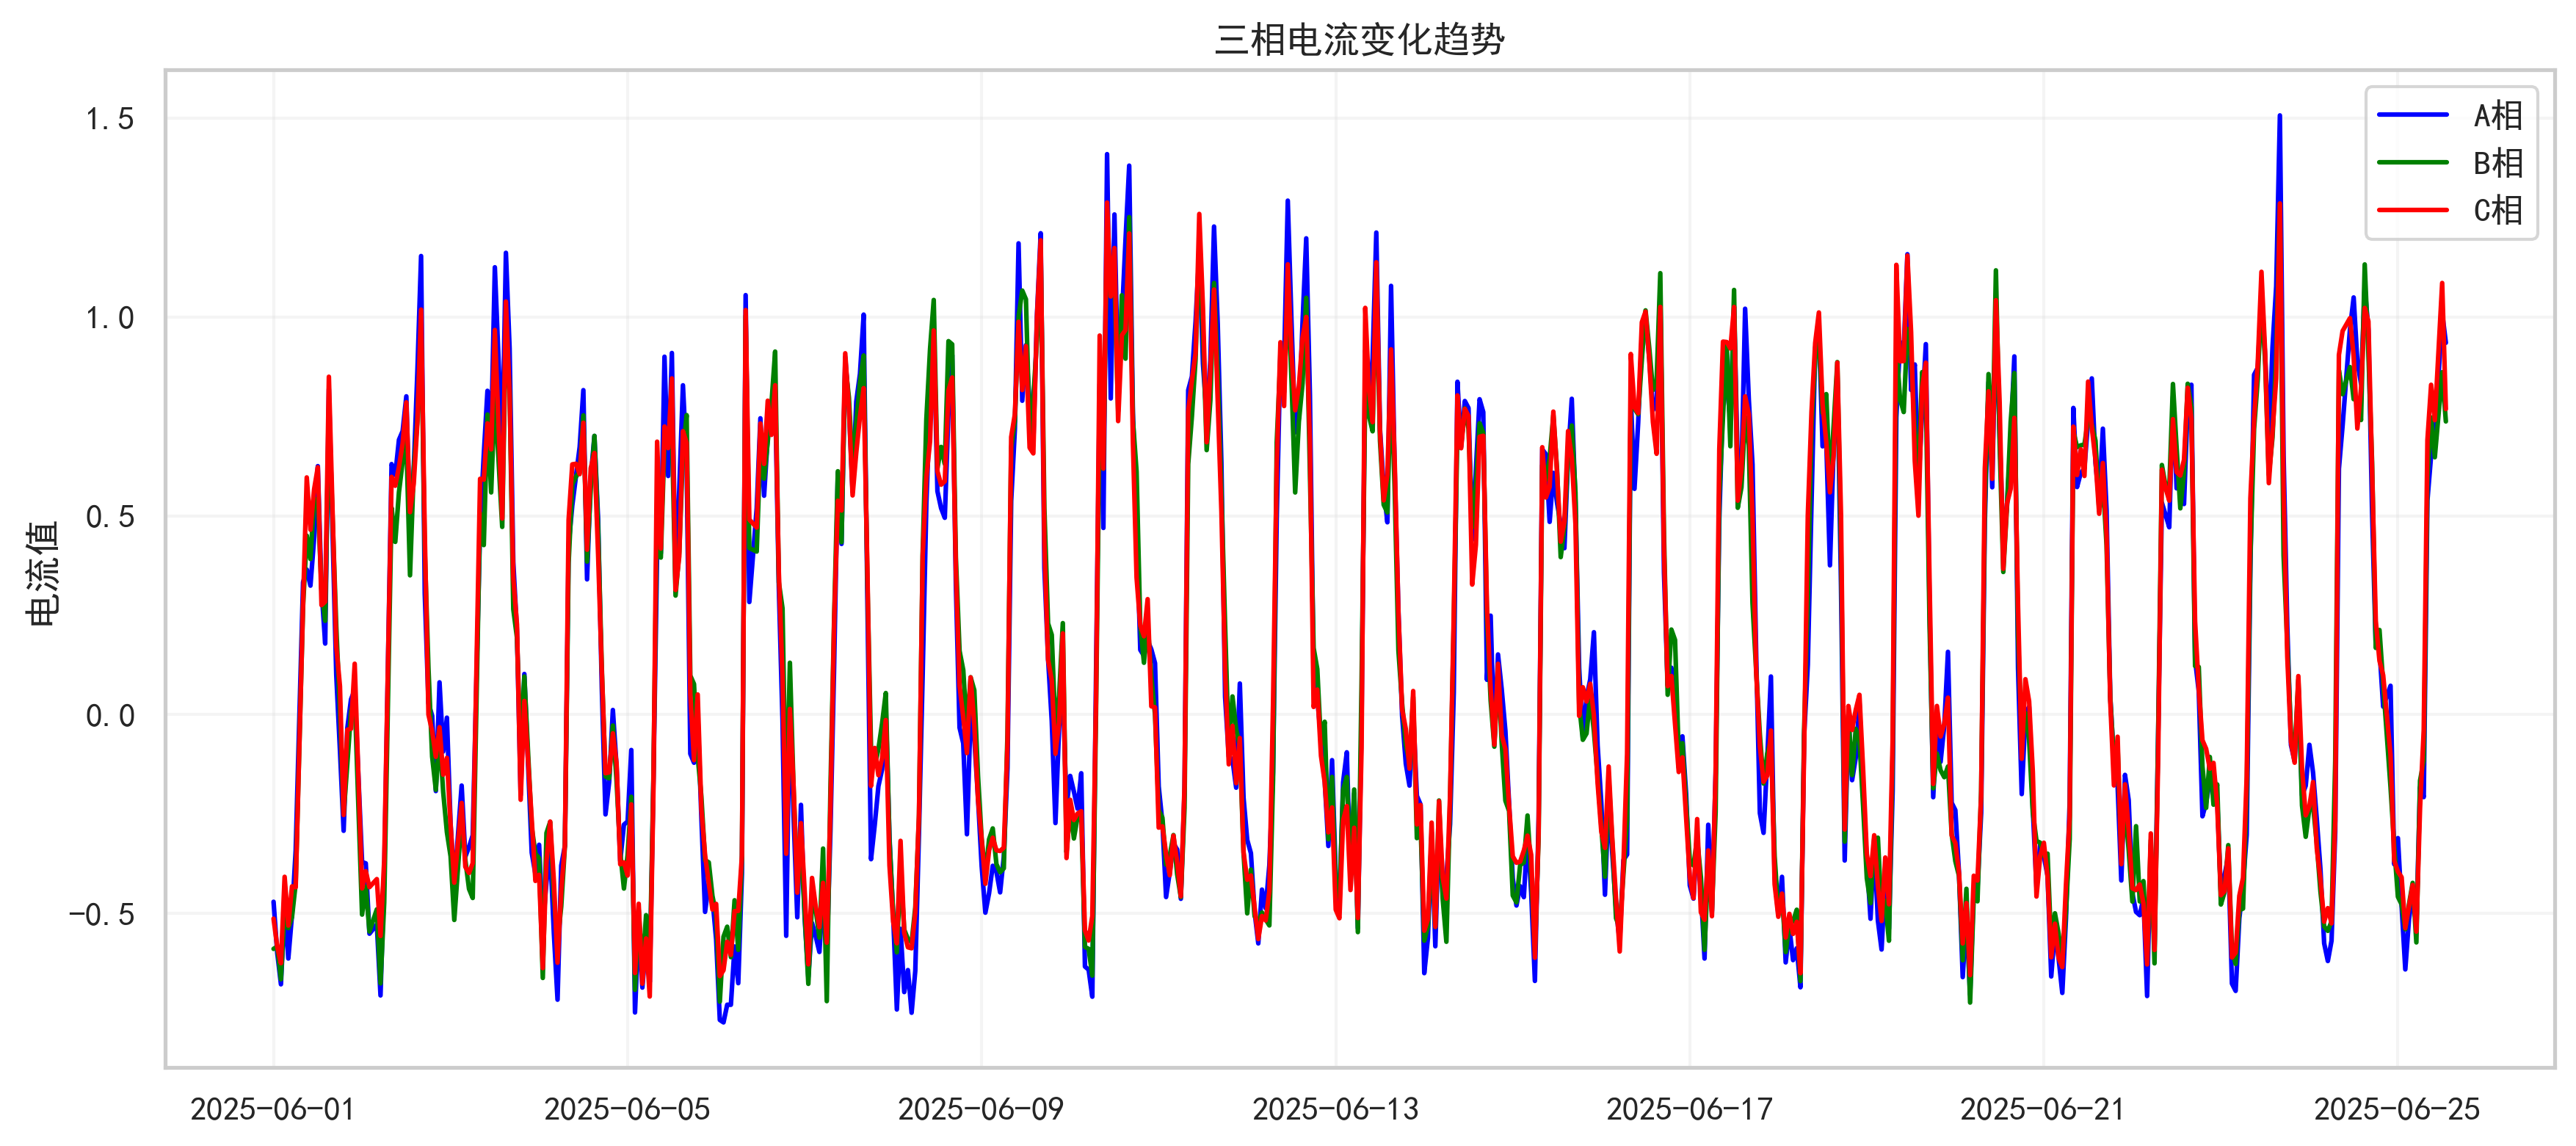

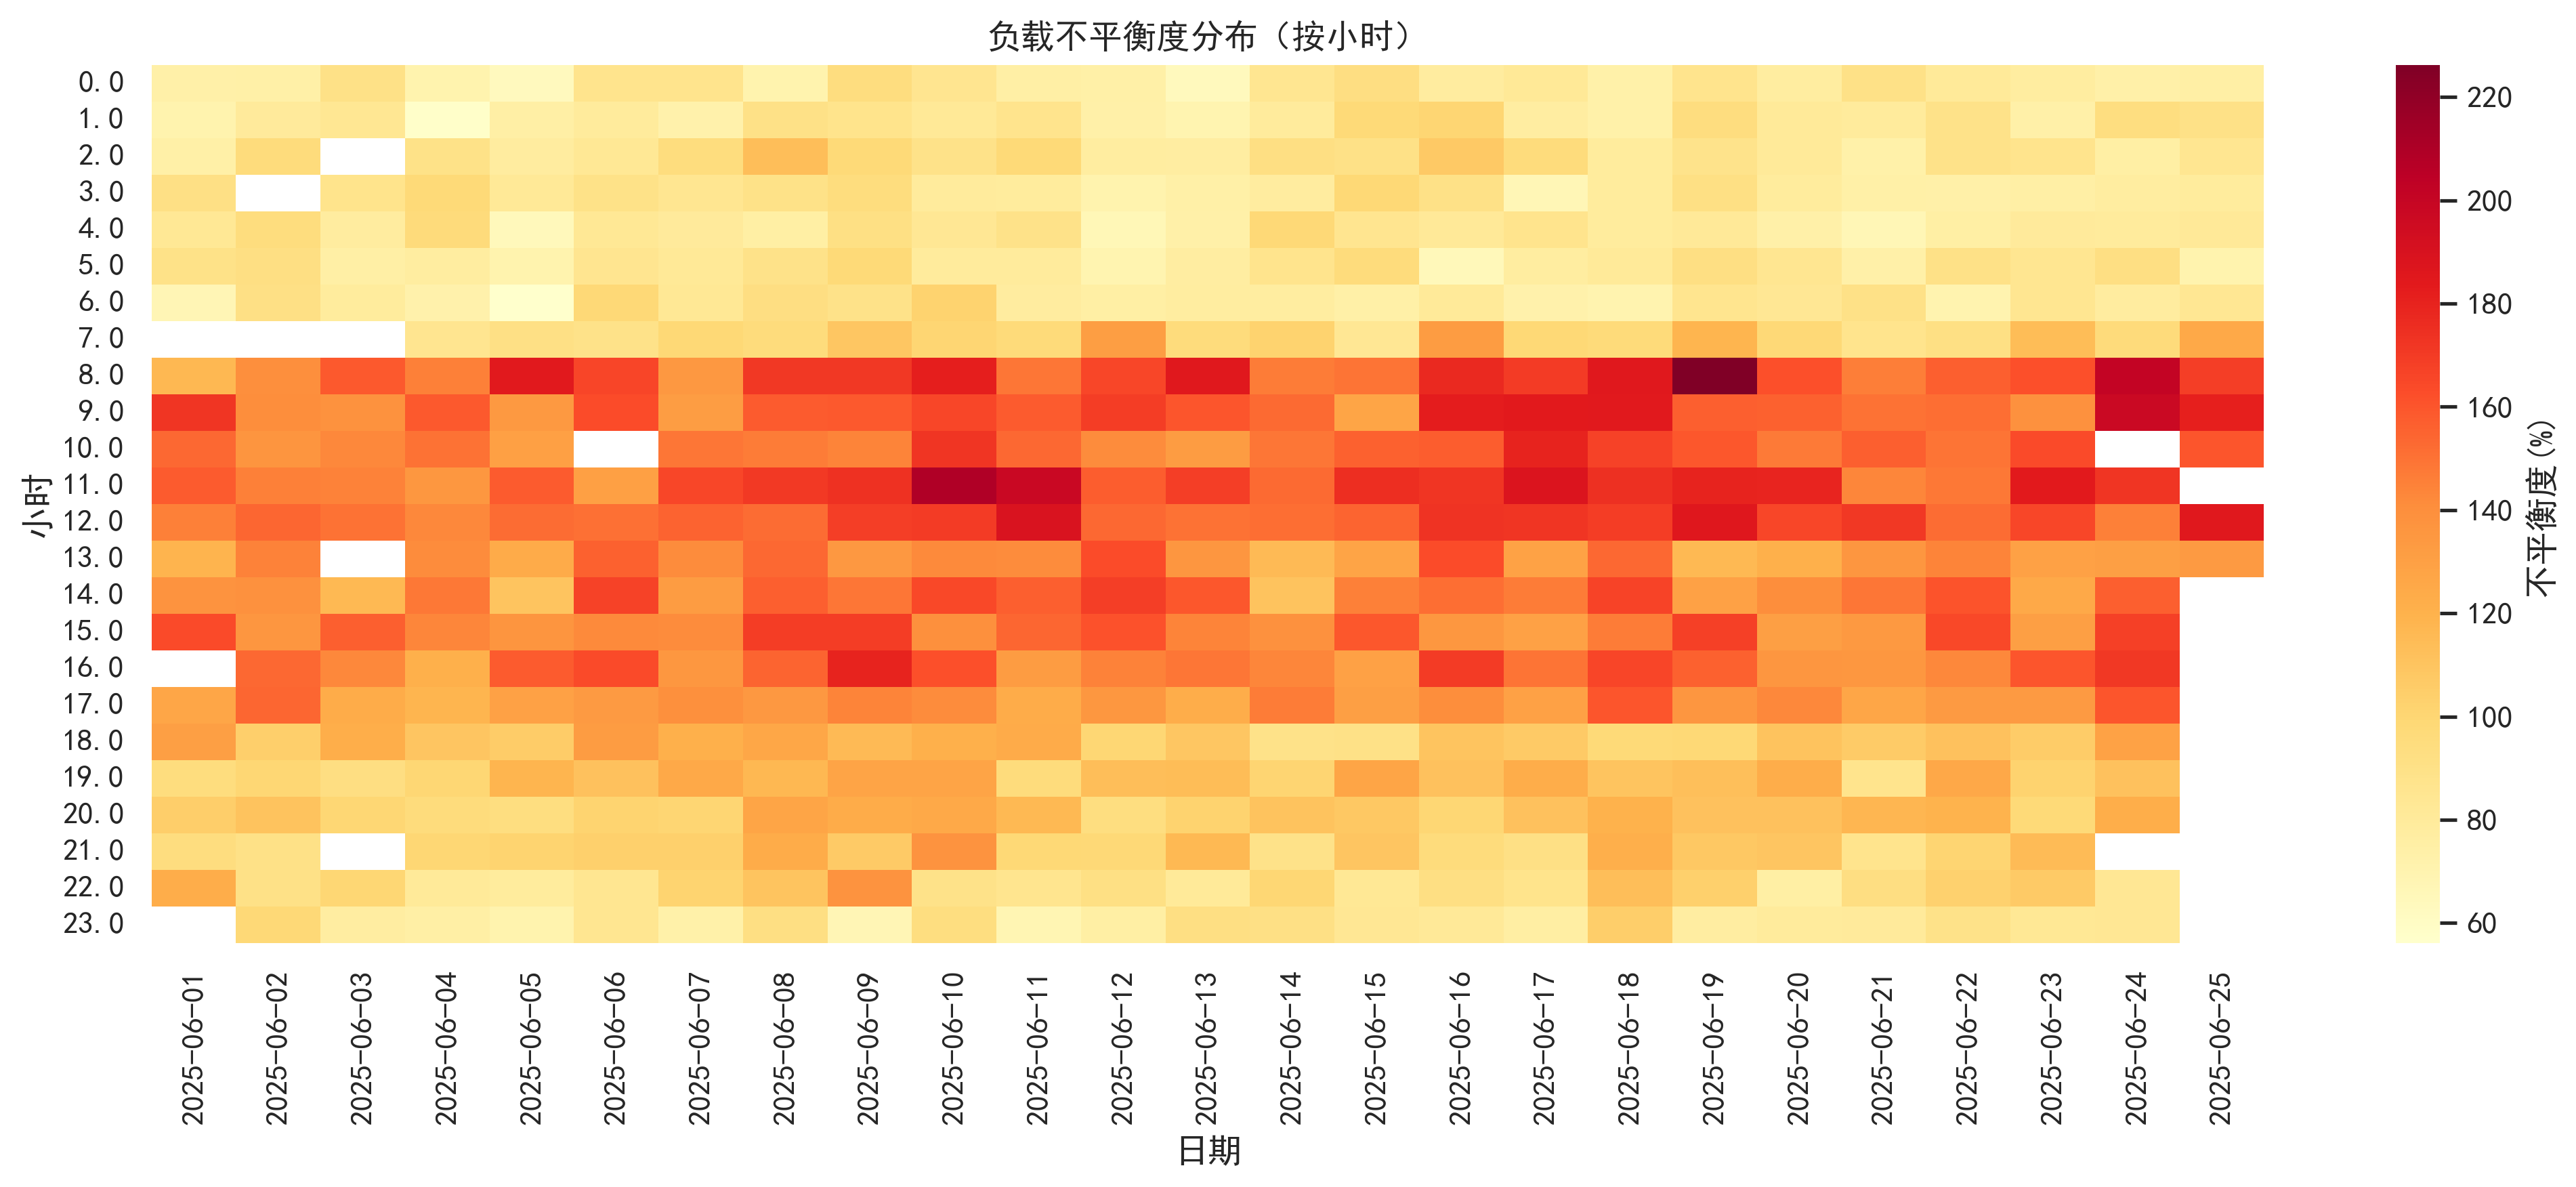

In [28]:
# 第一个画布 - 三相电流折线图
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df['timestamp'], df['current_A'], label='A相', color='blue')
ax1.plot(df['timestamp'], df['current_B'], label='B相', color='green')
ax1.plot(df['timestamp'], df['current_C'], label='C相', color='red')
ax1.set_ylabel('电流值')
ax1.legend()
ax1.set_title('三相电流变化趋势')
ax1.grid(alpha=0.2)

# 第二个画布 - 不平衡度热力图
fig2, ax2 = plt.subplots(figsize=(14, 6))
imbalance_matrix = df.pivot_table(index='hour', columns=df['timestamp'].dt.date, 
                                values='load_imbalance', aggfunc='mean')
sns.heatmap(imbalance_matrix, cmap='YlOrRd', ax=ax2, cbar_kws={'label': '不平衡度(%)'})
ax2.set_title('负载不平衡度分布（按小时）')
ax2.set_xlabel('日期')
ax2.set_ylabel('小时')

# 显示两个画布
plt.tight_layout()
plt.show()


- 分析结果：
1. 相位特性差异显著
    - A相：常为负载最重相位（电流峰值最高）
    - C相：多处于中间负载
    - B相：常为负载最轻相位（电流谷值最低）
2. 持续存在的三相不平衡现象
    - 电流趋势图显示：A/B/C三相电流始终未完全重合，存在明显差异
    - 不平衡度分布图证实：全天24小时基本存在不平衡（>0%），无完全平衡时段
3. 不平衡度与负荷强度的反向关系
    - 高负荷时段（如白天）不平衡度飙升
    - 低负荷时段（如夜间）不平衡度较低

### 3.用电效率分析

- 分析目标：分析功率因数（power_factor）与总功率的关系，评估用电效率

In [31]:
import warnings
warnings.filterwarnings('ignore')

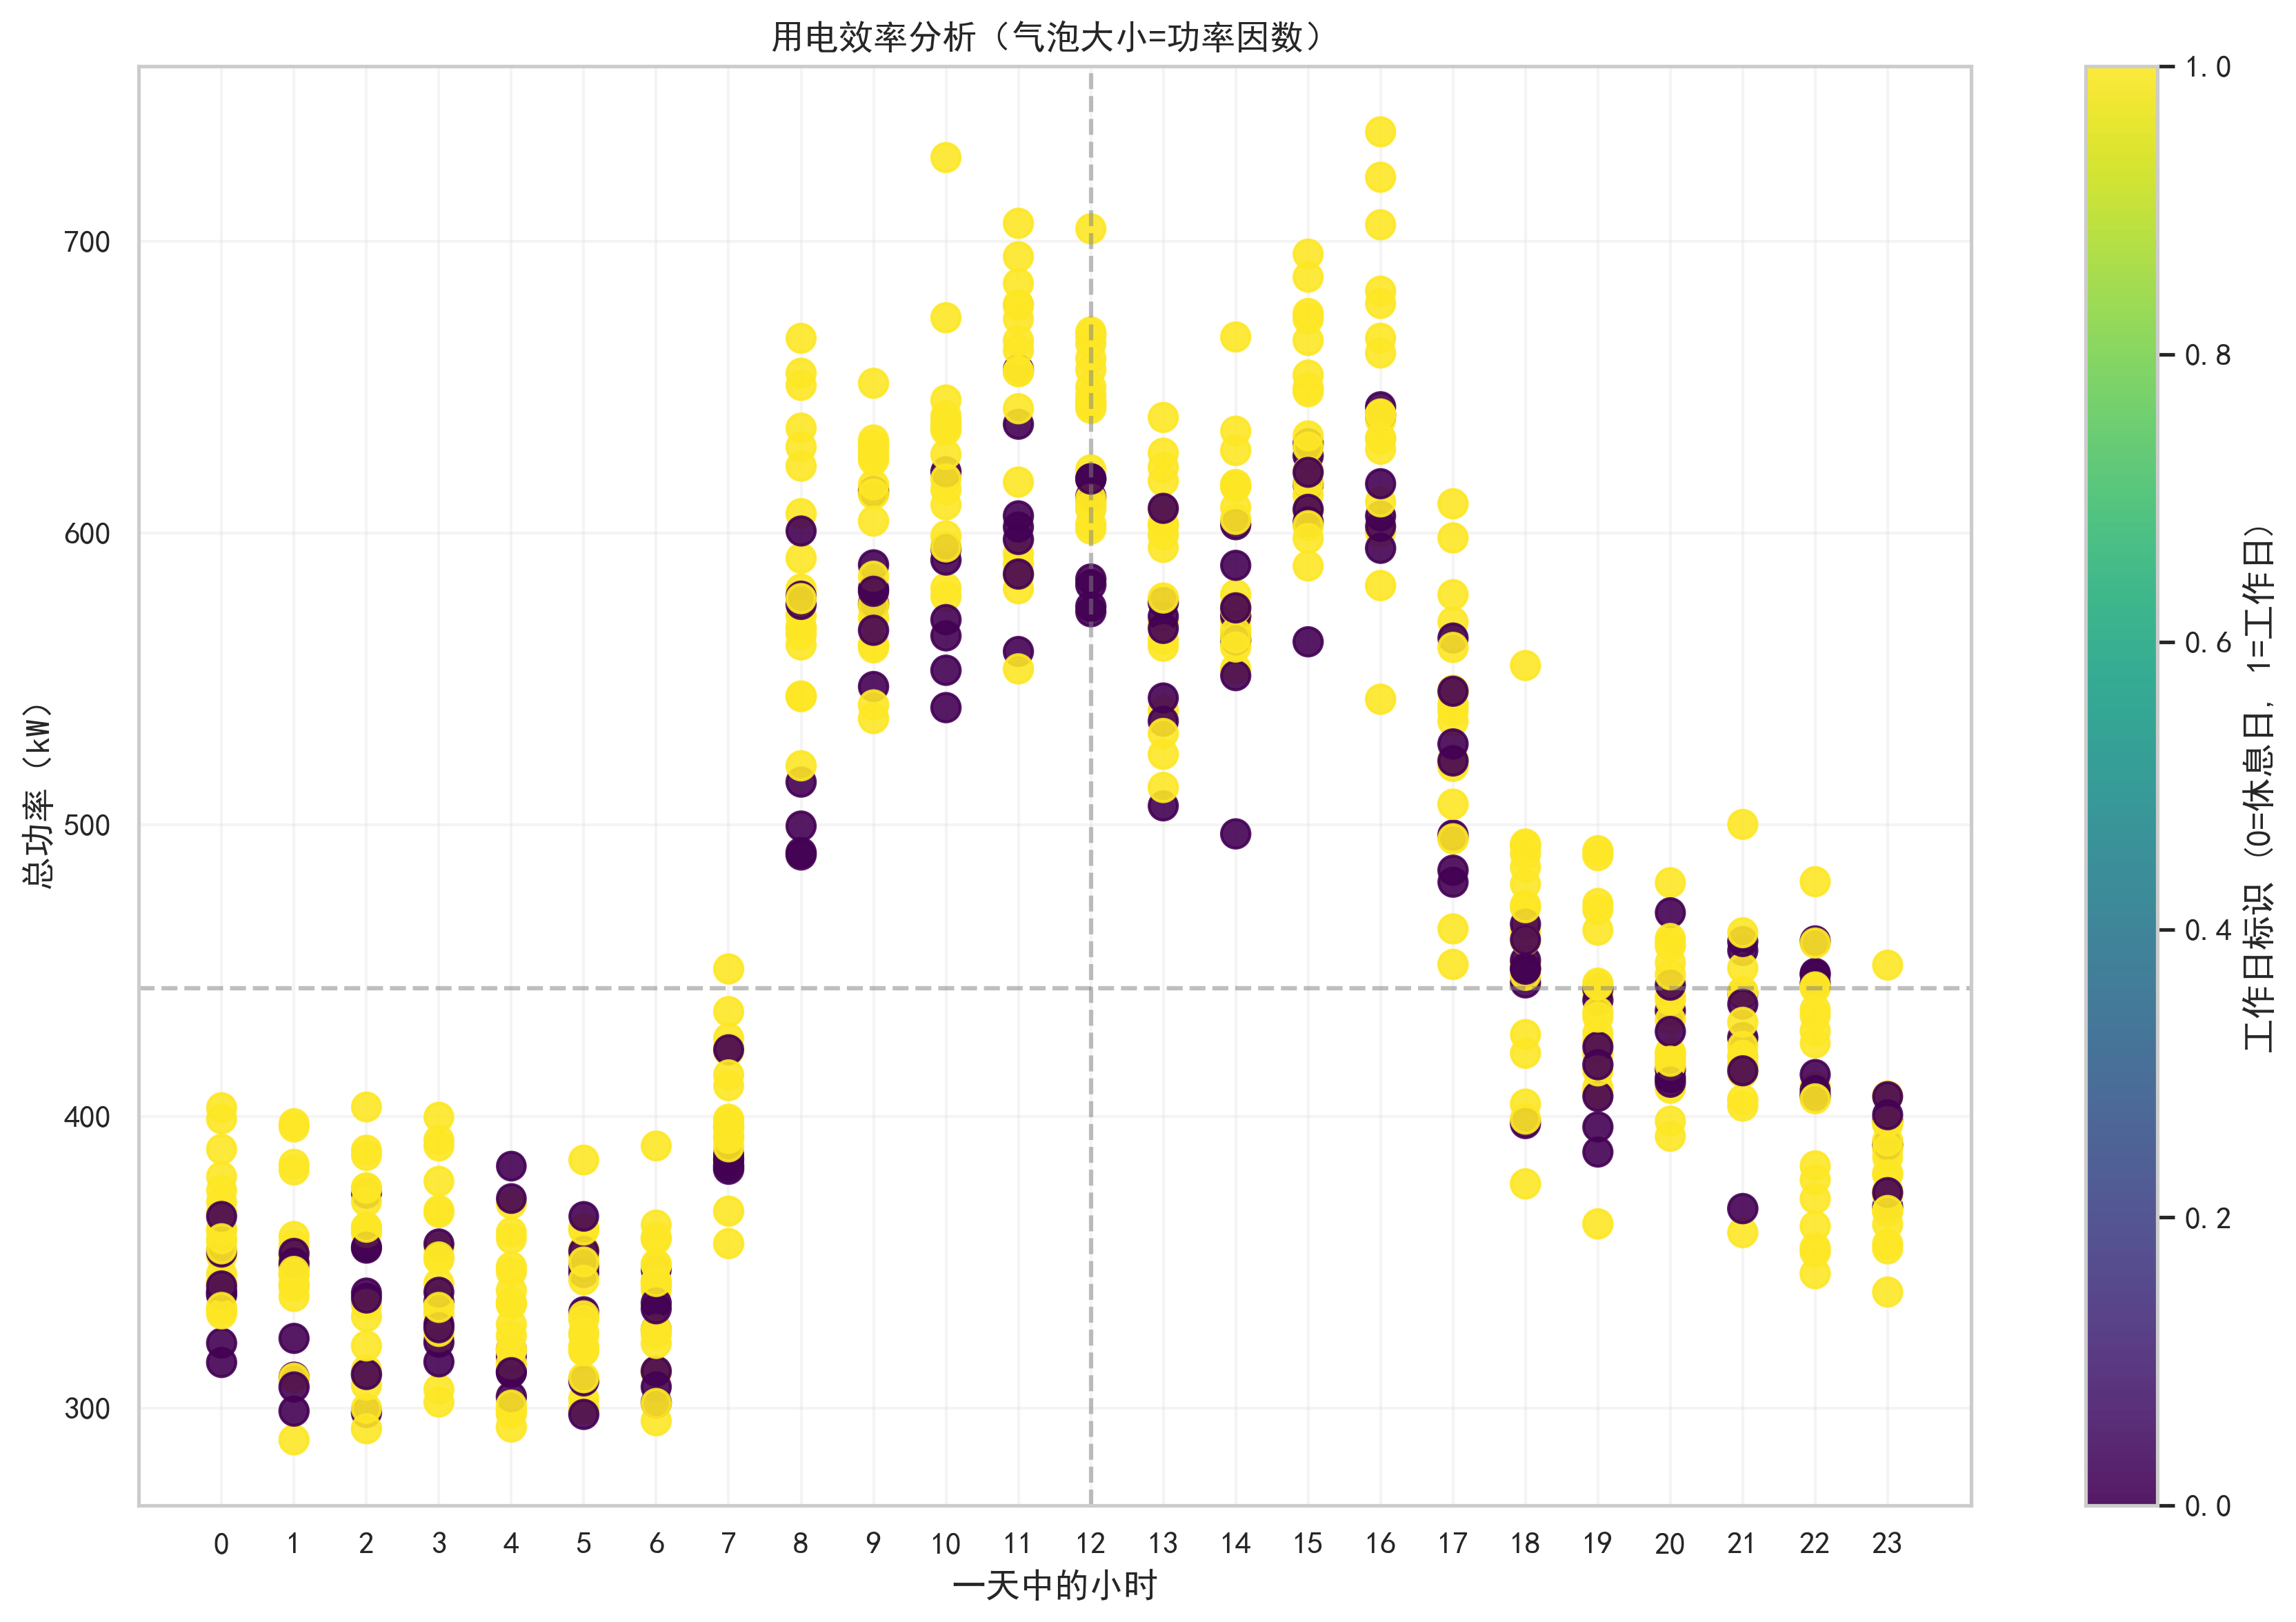

In [61]:
plt.figure(figsize=(12, 8))

# 创建气泡图
scatter = plt.scatter(
    x=df['hour'],
    y=df['total_power'],
    s=df['power_factor']*100, 
    c=df['is_workday'],      
    cmap='viridis',
    alpha=0.9
)

# 添加辅助线
plt.axhline(y=df['total_power'].median(), color='grey', linestyle='--', alpha=0.5)
plt.axvline(x=12, color='grey', linestyle='--', alpha=0.5)

plt.colorbar(scatter, label='工作日标识 (0=休息日, 1=工作日)')
plt.title('用电效率分析（气泡大小=功率因数）')
plt.xlabel('一天中的小时')
plt.ylabel('总功率（kW）')
plt.grid(alpha=0.2)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [56]:
df.describe()

,active_energy,current_A,current_B,current_C,power_A,power_B,power_C,apparent_power,hour,is_workday,total_power,power_factor,load_imbalance,energy_delta
count,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,9.354457e+06,0.122847,0.124702,0.135832,0.122243,0.124995,0.141067,0.122514,11.376083,0.714038,472.114003,0.974421,117.255013,479.870017
std,7.947110e+04,0.556728,0.532905,0.535220,0.558660,0.521595,0.530301,0.537364,6.922862,0.452263,119.876101,0.008761,34.394517,140.569410
min,9.215940e+06,-0.774191,-0.724302,-0.709037,-0.780632,-0.702043,-0.688268,-0.714927,0.000000,0.000000,289.210000,0.941402,56.111021,0.000000
25%,9.284675e+06,-0.363737,-0.352841,-0.353478,-0.361506,-0.346006,-0.346317,-0.369310,5.000000,0.000000,361.350000,0.969569,87.164505,359.000000
50%,9.355175e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,444.100000,0.975455,111.271995,442.000000
75%,9.422905e+06,0.636263,0.647159,0.646522,0.638494,0.653994,0.653683,0.630690,17.000000,1.000000,588.760000,0.981039,146.112716,594.000000
max,9.492825e+06,1.506900,1.284198,1.287721,1.491843,1.243839,1.269792,1.332237,23.000000,1.000000,737.590000,0.992459,226.222341,1290.000000


- 分析结果：
1. 功率因数与负荷强度的正相关性
    - 显著正相关趋势：图中显示明确的规律——总功率越高，功率因数越高（气泡越大。因为标准差很小很小，所以气泡大小差异不明显）


### 4.能量增量异常检测

- 分析目标：识别异常用电事件

In [80]:
# 计算能量增量的统计特征
energy_delta = df['energy_delta'].dropna()
mean_val = energy_delta.mean()
std_val = energy_delta.std()
threshold = mean_val + 3 * std_val

# 标记异常点
df['is_anomaly'] = df['energy_delta'] > threshold


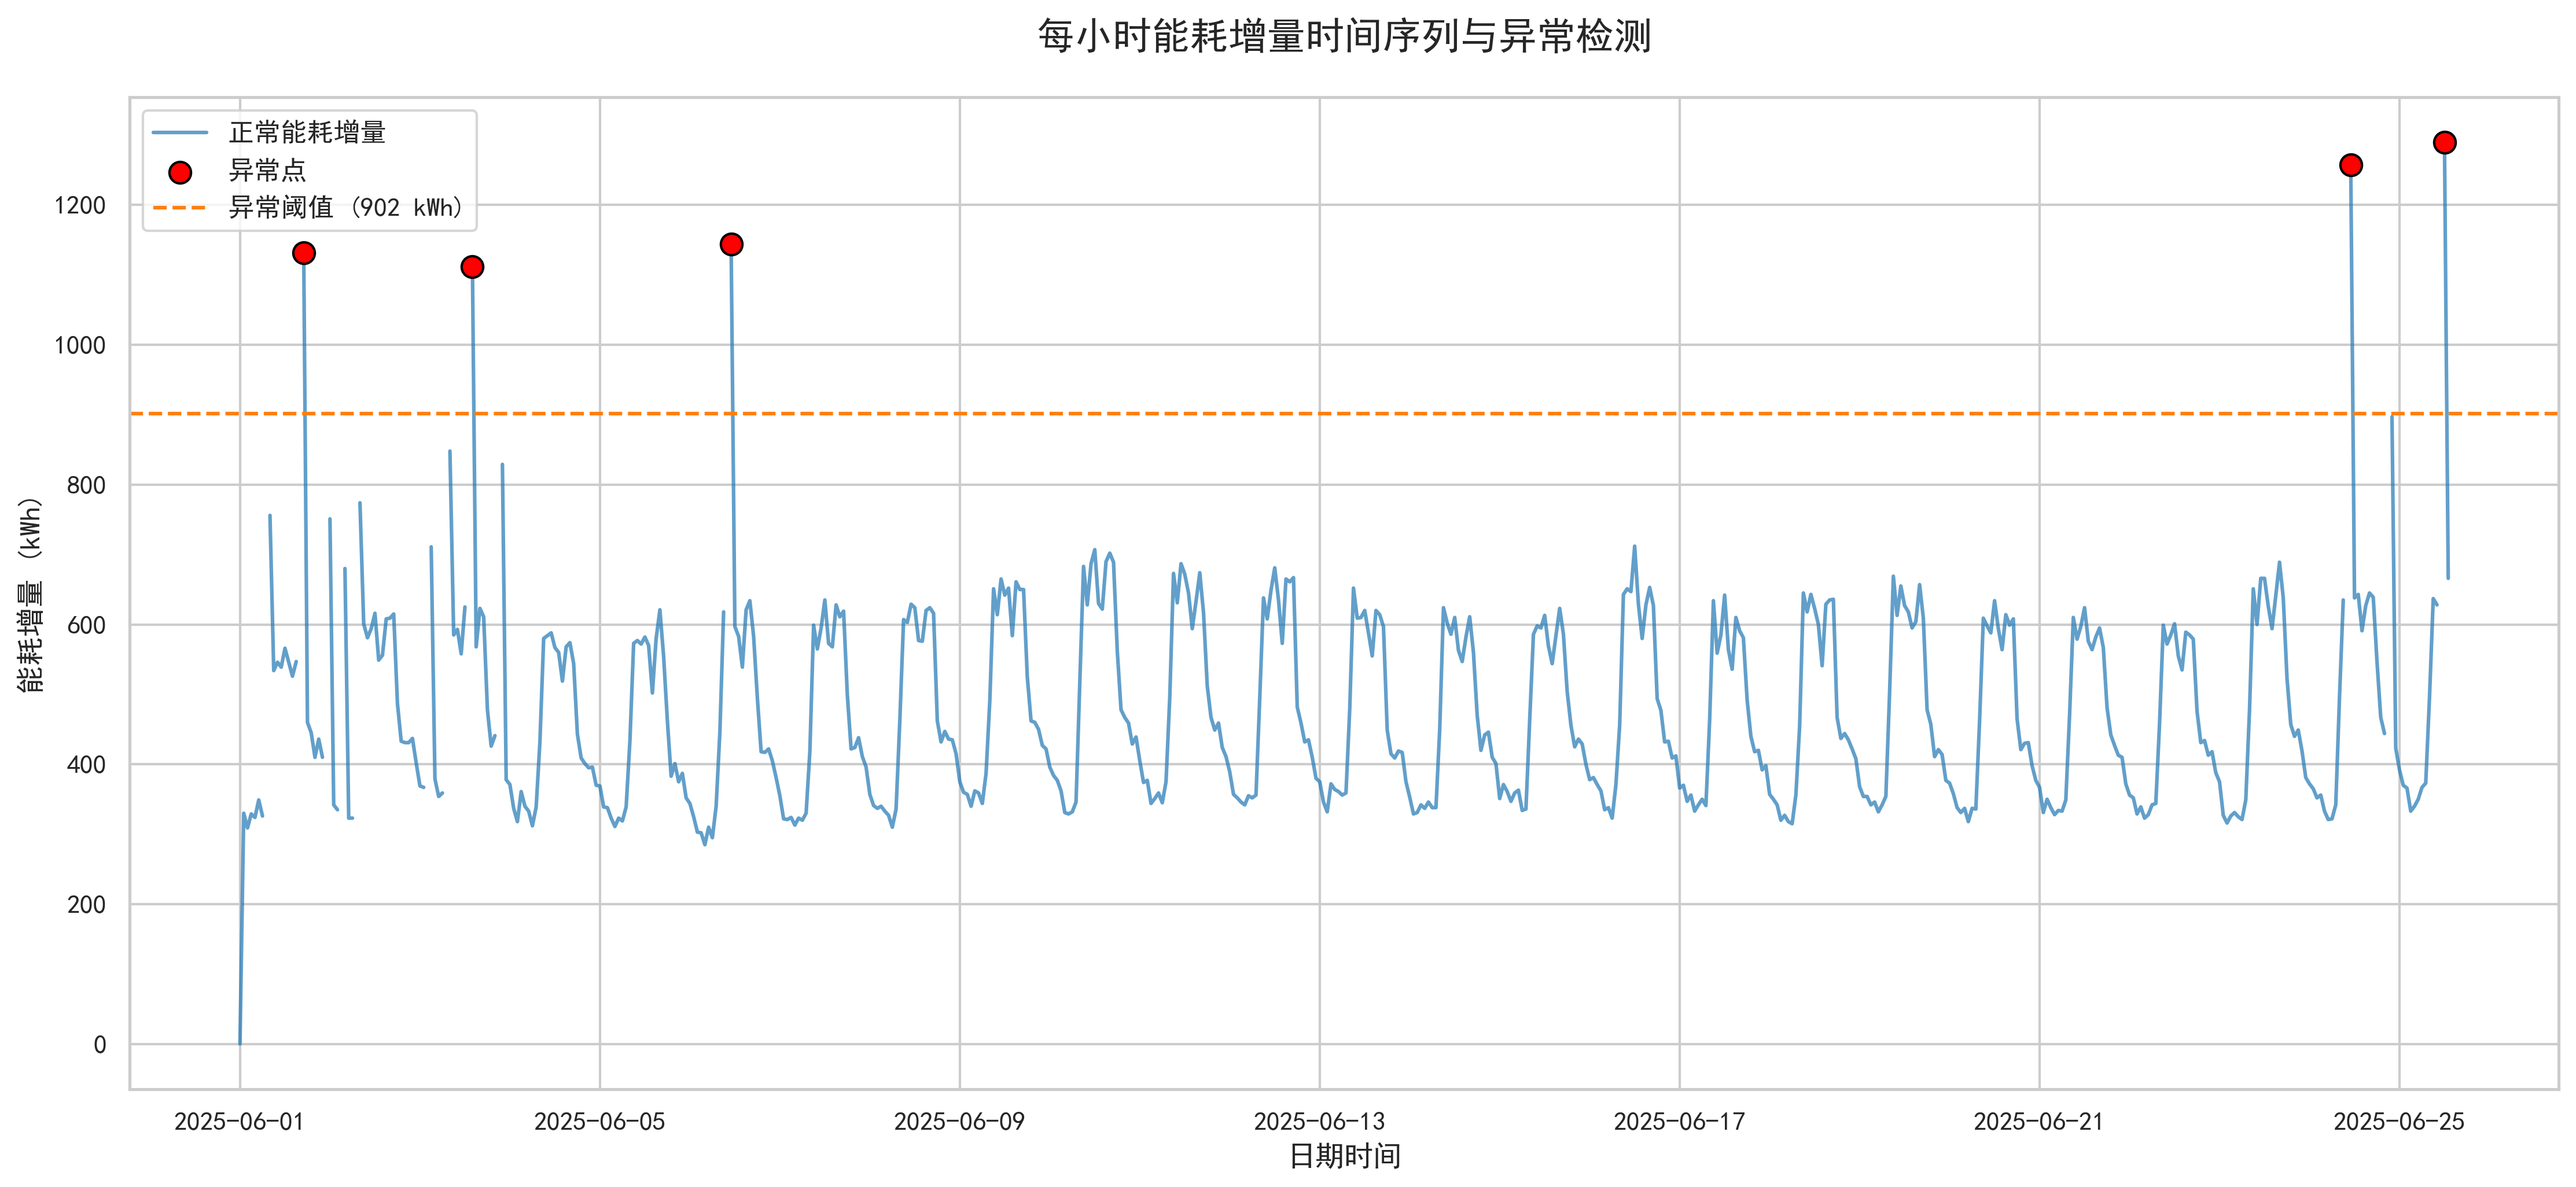

In [36]:
# 1. energy_delta时间序列图（突出异常点）
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['energy_delta'], 
         color='#1f77b4', 
         alpha=0.7, 
         label='正常能耗增量')

# 标记异常点
anomalies = df[df['is_anomaly']]
plt.scatter(anomalies.index, anomalies['energy_delta'], 
            color='red', 
            s=80,
            edgecolor='black',
            zorder=5,
            label='异常点')

# 添加阈值线
plt.axhline(y=threshold, color='#ff7f0e', linestyle='--', 
            label=f'异常阈值 ({threshold:.0f} kWh)')

plt.title('每小时能耗增量时间序列与异常检测', fontsize=16, pad=20)
plt.ylabel('能耗增量 (kWh)', fontsize=12)
plt.xlabel('日期时间', fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('energy_delta_anomalies.png', dpi=300)
plt.show()


In [62]:
df.tail()

,timestamp,active_energy,current_A,current_B,current_C,power_A,power_B,power_C,apparent_power,hour,is_workday,total_power,power_factor,load_imbalance,energy_delta
584,2025-06-25 08:00:00,9489604.0,0.538864,0.597224,0.690272,0.514752,0.572879,0.677468,0.586060,8.0,1.0,577.58,0.981795,168.898059,495.0
585,2025-06-25 09:00:00,9490241.0,0.651927,0.747318,0.829402,0.663311,0.733127,0.842238,0.734353,9.0,1.0,613.42,0.986761,181.280814,637.0
586,2025-06-25 10:00:00,9490869.0,0.683058,0.647159,0.740611,0.676848,0.616347,0.733770,0.652427,10.0,1.0,595.33,0.986920,160.248787,628.0
588,2025-06-25 12:00:00,9492159.0,1.010747,0.860865,1.085444,1.011454,0.823034,1.018384,0.935677,12.0,1.0,656.07,0.983702,185.573644,1290.0
589,2025-06-25 13:00:00,9492825.0,0.935081,0.737227,0.768231,0.975009,0.749102,0.782259,0.832681,13.0,1.0,627.45,0.974649,133.822485,666.0


- 分析结果：
1. 异常值点6月2日，6月3日，6月6日，6月24日，6月25日，垂直尖峰形态，脱离正常波动带，基本发生在白天
2. 发生可能的原因：
    主变压器短路故障， 多台电机同时堵转...

### 5. 系统效率综合评分

- 分析目标：评估综合用电效率

In [73]:
# 筛选异常事件
anomalies = df[df['is_anomaly'] == 1]

# 工作日与休息日异常事件数量对比
workday_anomalies = df[df['is_workday'] == 1]['is_anomaly'].sum()
non_workday_anomalies = df[df['is_workday'] == 0]['is_anomaly'].sum()


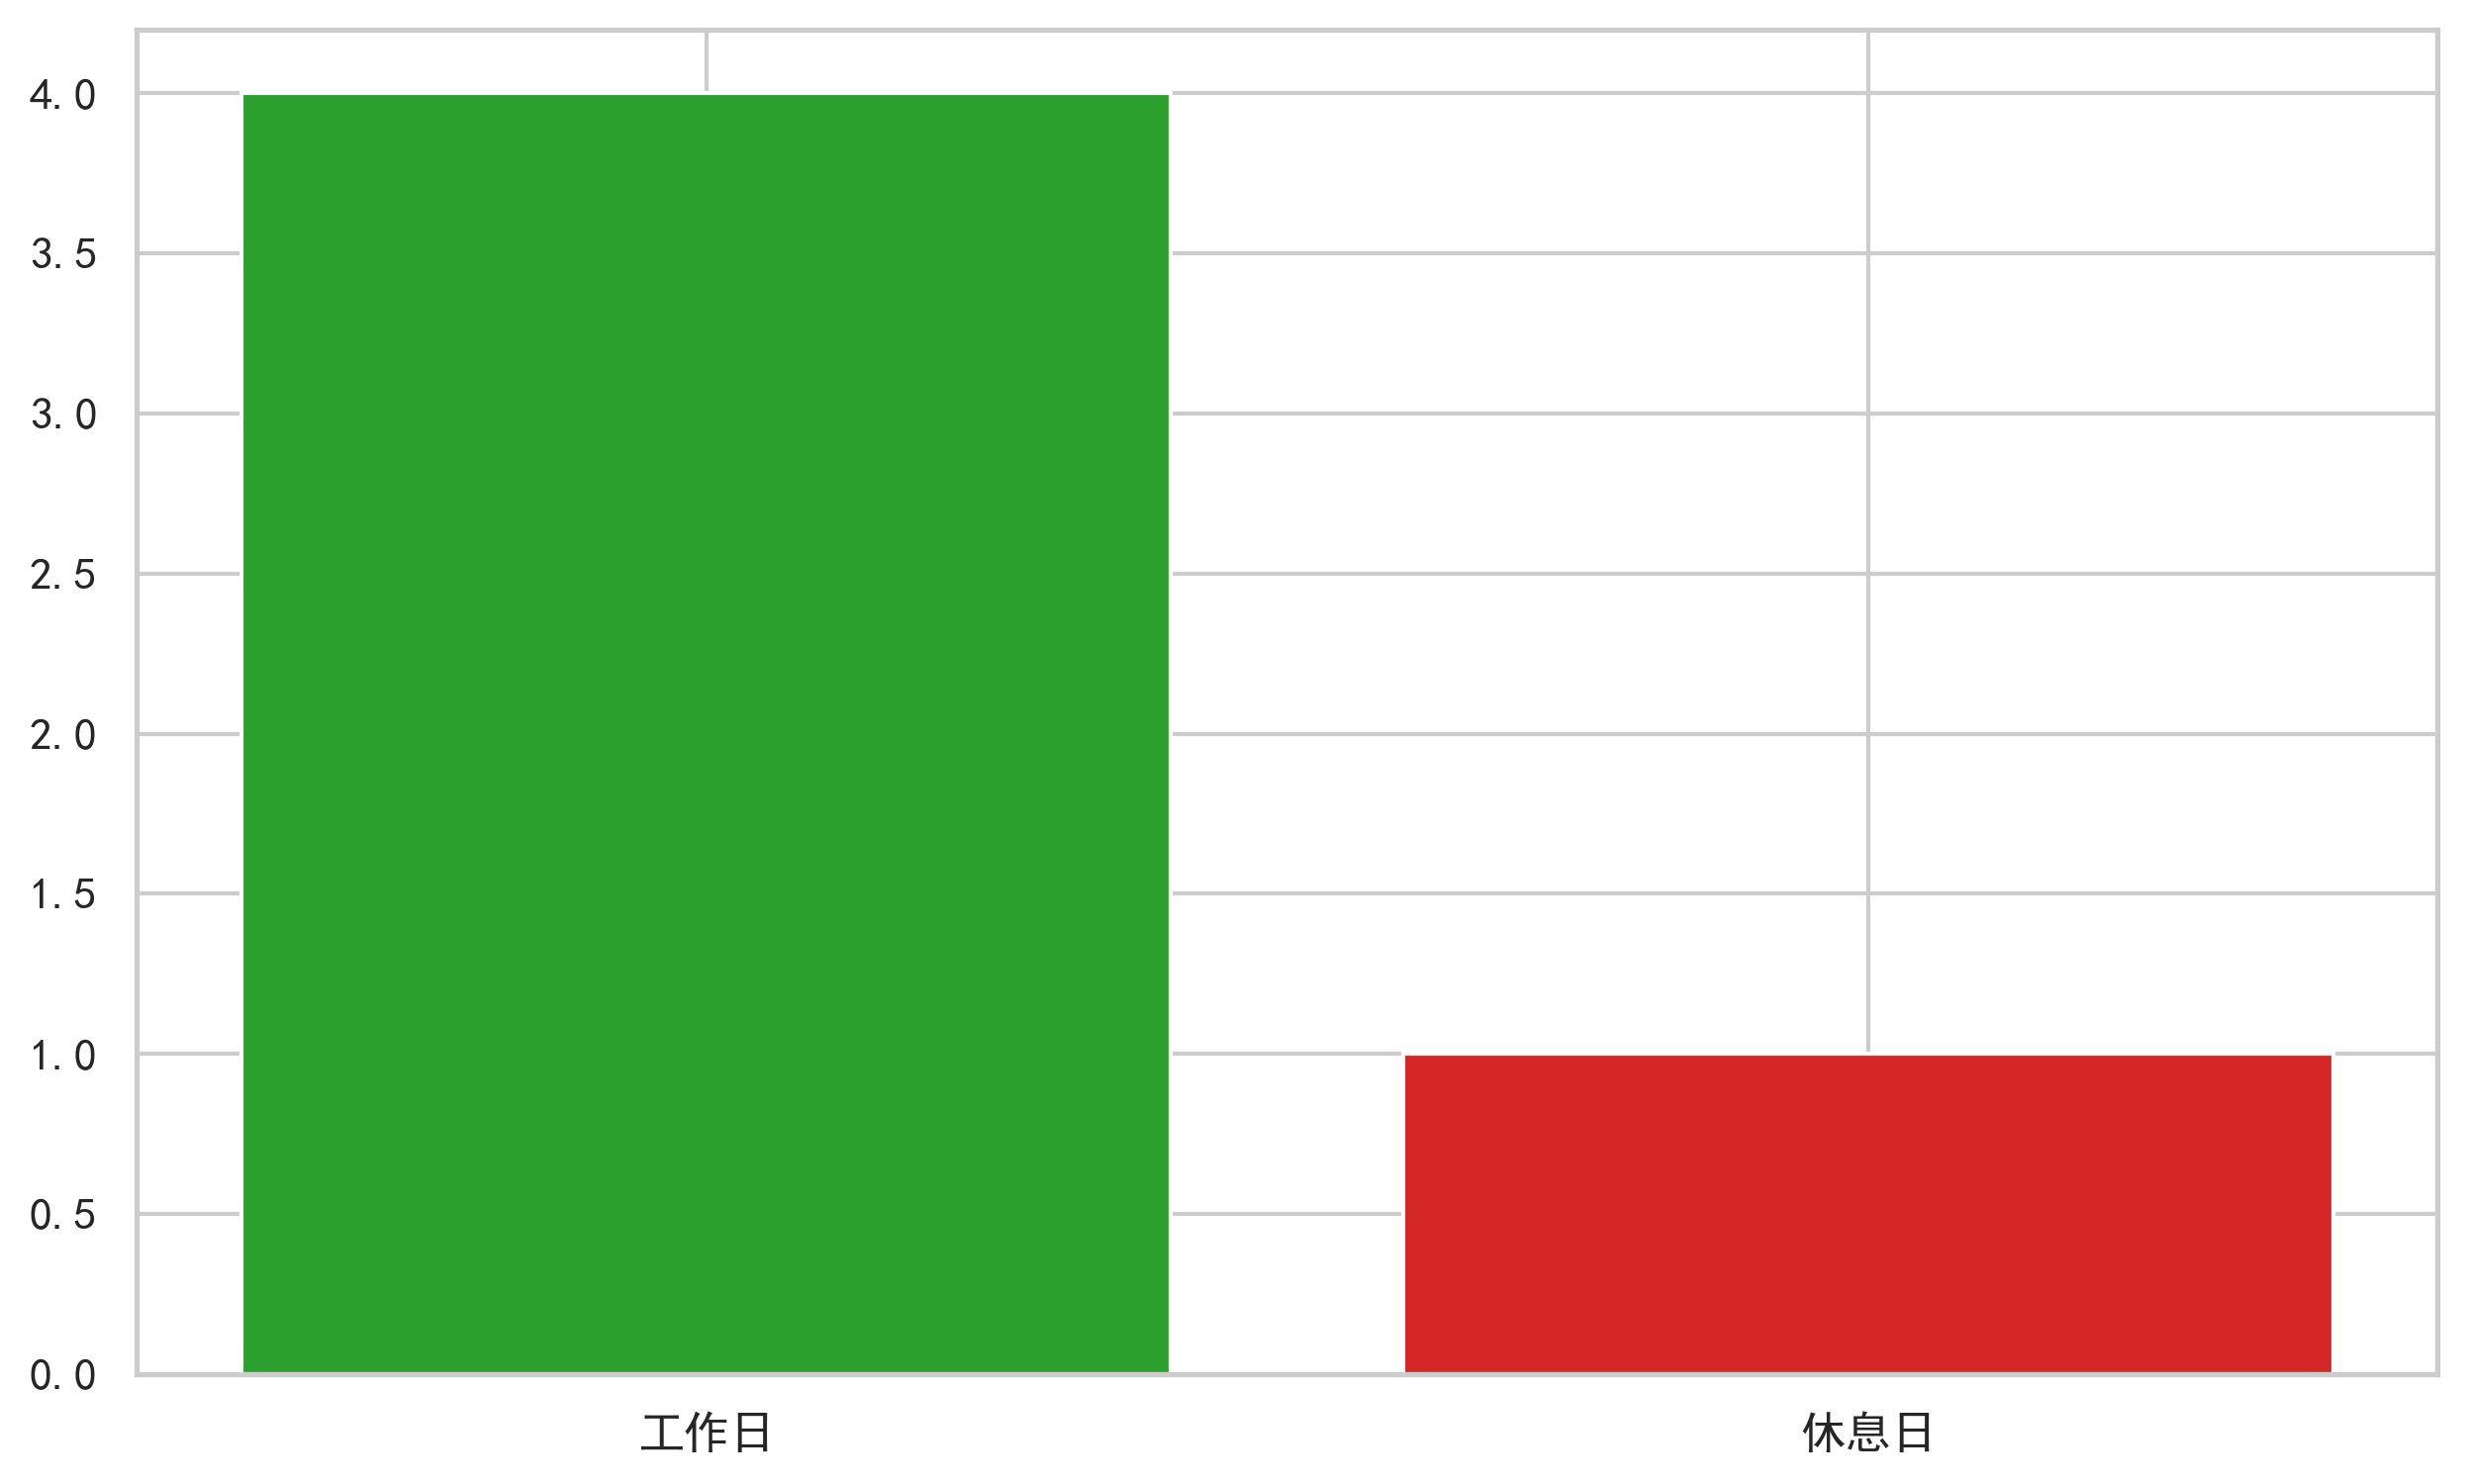

In [74]:
#工作日和休息日各异常事件的总天数
plt.figure(figsize=(10, 6))
bars = plt.bar(['工作日', '休息日'], 
               [workday_anomalies, non_workday_anomalies],
               color=['#2ca02c', '#d62728'])

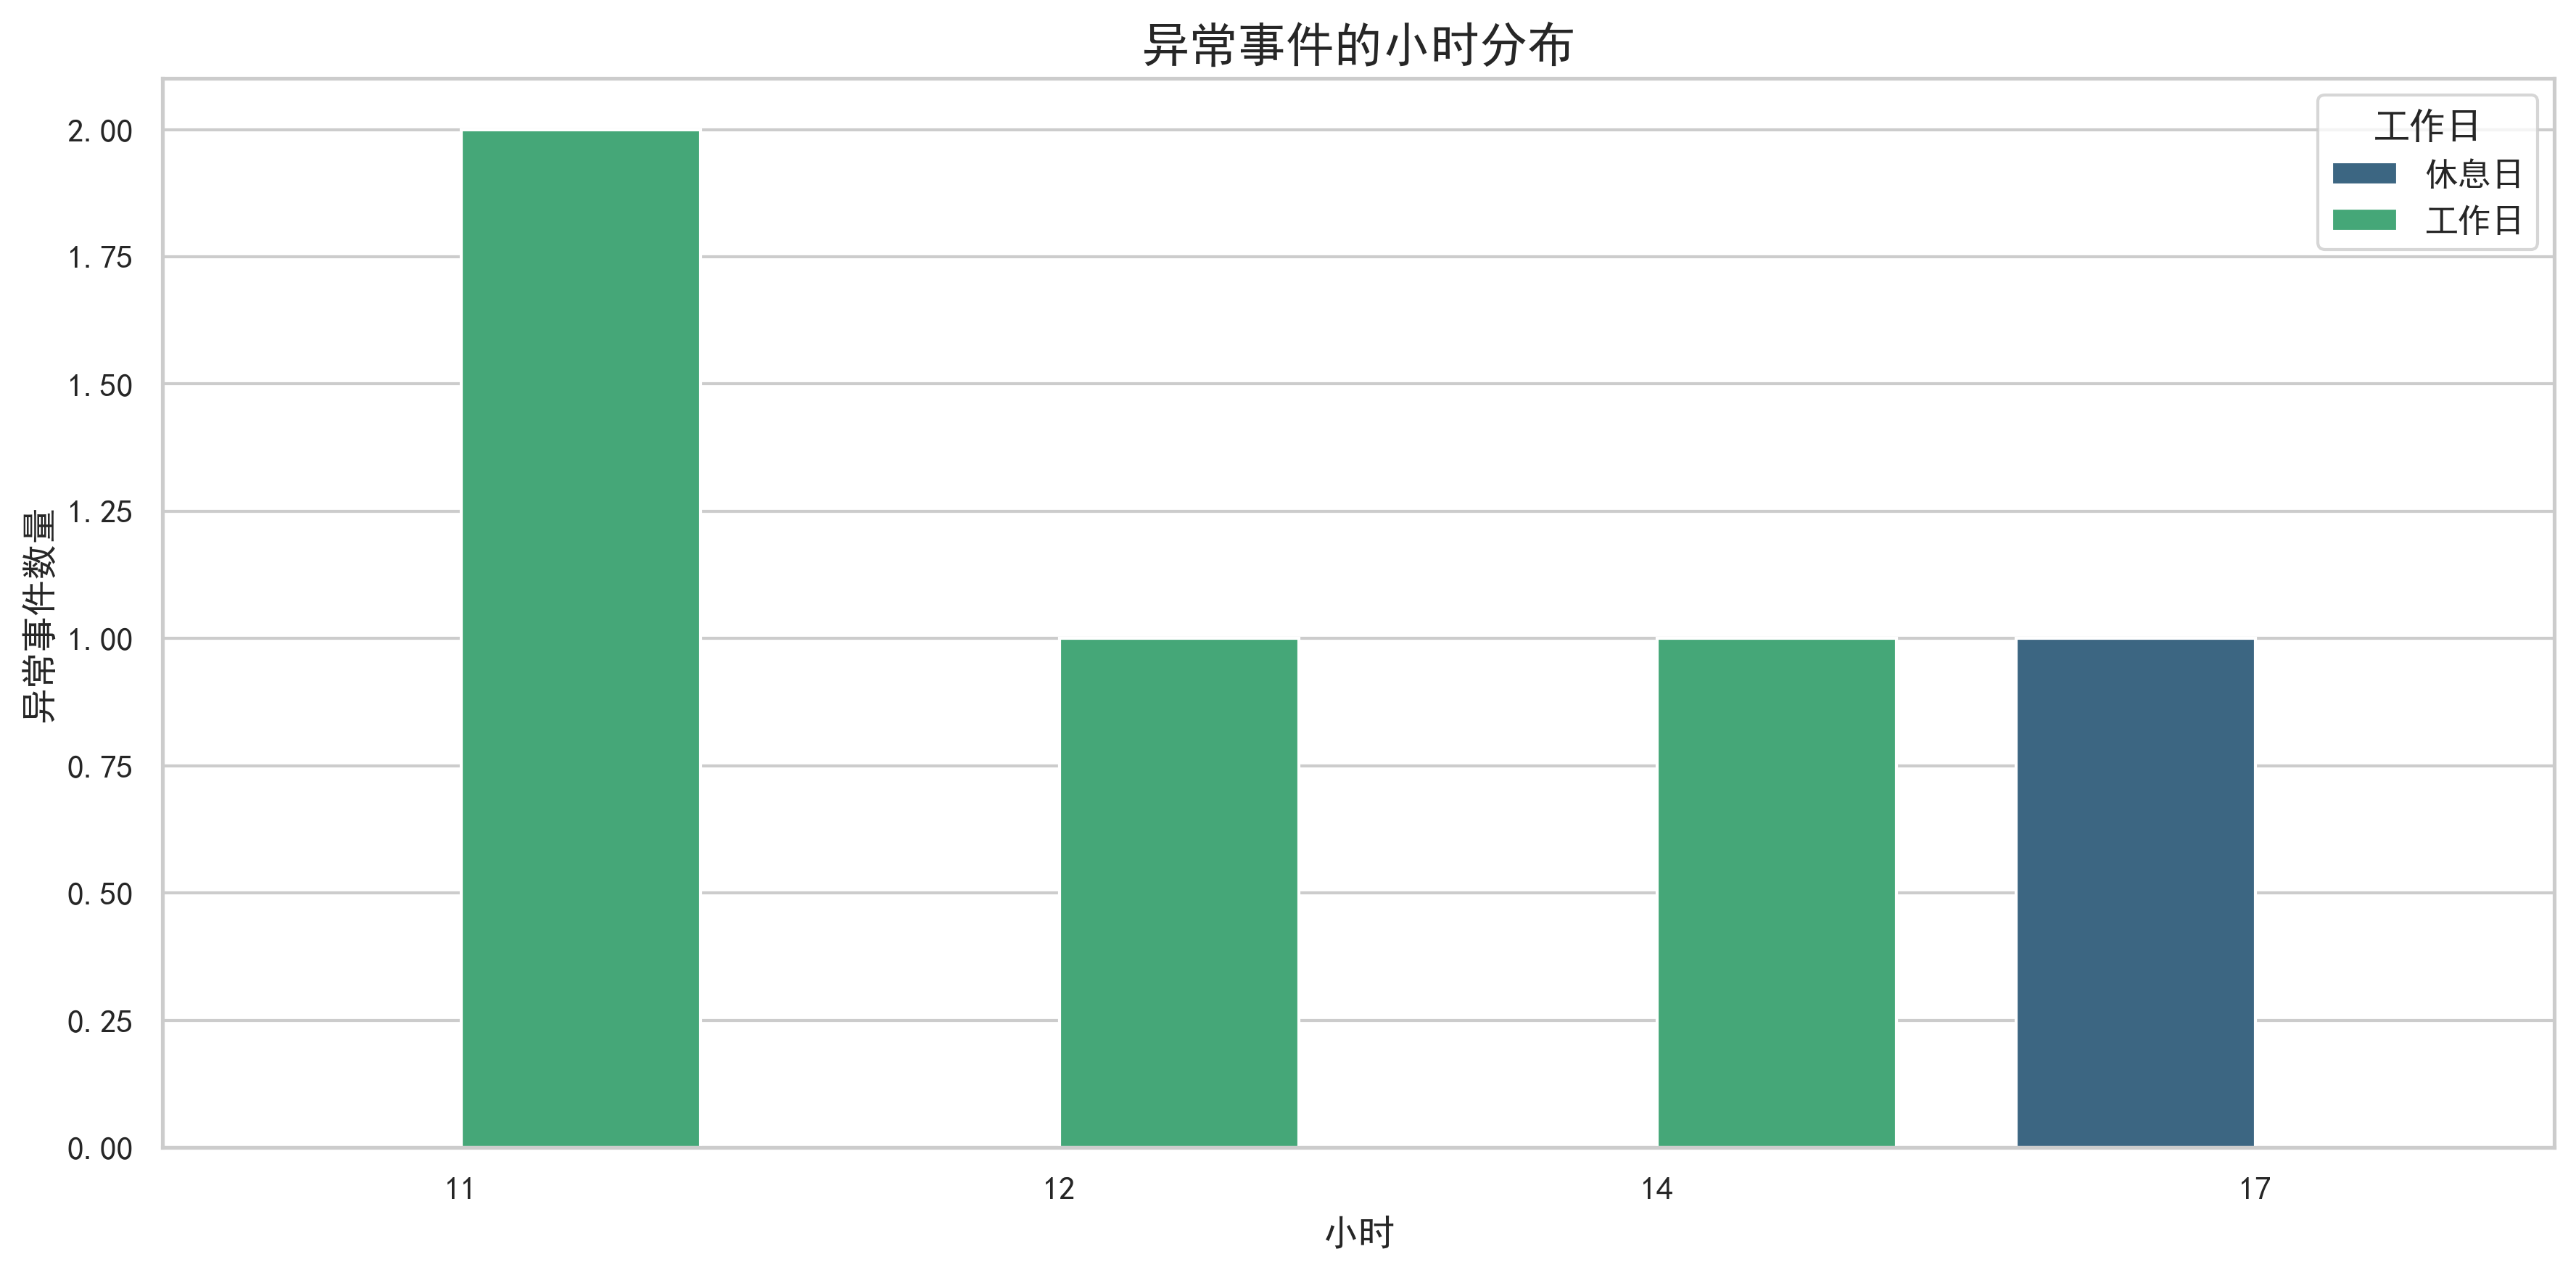

In [75]:
# 异常时段分布
plt.figure(figsize=(12, 6))

# 使用重置索引确保对齐
plot_data = anomalies.reset_index()[['is_workday']]
plot_data['hour'] = anomalies.index.hour

sns.countplot(
    x='hour', 
    hue='is_workday',
    data=plot_data,
    palette='viridis'
)

plt.title('异常事件的小时分布', fontsize=16)
plt.xlabel('小时', fontsize=12)
plt.ylabel('异常事件数量', fontsize=12)
plt.legend(title='工作日', labels=['休息日', '工作日'])
plt.tight_layout()
plt.savefig('anomaly_hour_distribution.png', dpi=300)
plt.show()

- 分析结果：
1. 异常事件与工作强度的强关联性
    - 工作日异常高发：工作日异常事件数量达 4.75次/天，约是休息日的3倍
2. 崩溃高危时段
| 时间段         | 风险特征（可能的情况）   |
| -------------- | ----------------------- |
| 14:00          | 工业设备过热保护触发    |
| 17:00          | 交接班设备启停冲击      |
| 11:00-12:00    | 满负荷运行共振点        |
